In [2]:
from keras.models import load_model
from astropy.io import fits
import numpy as np
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import json

Using TensorFlow backend.


In [3]:
basedir = "/scratch/dgandhi/desi/time-domain-bkup/tuning_batch_v2/cnn/categorical/"
models = ["batch(07-18_14:44:48)/iter(17)_run(07-18_14:44:49_511884)/weights/weights.Ep73-ValAcc0.83.hdf5",
          "batch(07-18_14:44:48)/iter(67)_run(07-18_14:44:54_886971)/weights/weights.Ep72-ValAcc0.84.hdf5",
          "batch(07-19_11:36:51)/iter(92)_run(07-19_11:36:55_775852)/weights/weights.Ep75-ValAcc0.87.hdf5",
          "batch(07-19_11:36:51)/iter(64)_run(07-19_11:36:54_667053)/weights/weights.Ep73-ValAcc0.86.hdf5",
          "batch(07-19_11:36:51)/iter(45)_run(07-19_11:36:53_892865)/weights/weights.Ep70-ValAcc0.85.hdf5",
          "batch(07-19_11:36:51)/iter(27)_run(07-19_11:36:53_132799)/weights/weights.Ep73-ValAcc0.85.hdf5",
          "batch(07-20_15:55:00)/iter(47)_run(07-20_15:55:02_573722)/weights/weights.Ep58-ValAcc0.87.hdf5"
         ]

In [4]:
h = fits.open('/scratch/dgandhi/desi/time-domain-bkup/tuning_batch_v2/x_test.fits')
x_test_ = h[0].data
h.close()
h = fits.open('/scratch/dgandhi/desi/time-domain-bkup/tuning_batch_v2/y_test.fits')
y_test_ = h[0].data
h.close()

h = fits.open('/scratch/dgandhi/desi/time-domain-bkup/tuning_batch_v2/data/x_test_rfr_greater05.fits')
x_test_bright = h[0].data
h.close()
h = fits.open('/scratch/dgandhi/desi/time-domain-bkup/tuning_batch_v2/data/y_test_rfr_greater05.fits')
y_test_bright = h[0].data

h.close()

In [5]:
print(x_test_.shape)
print(x_test_bright.shape)
print(y_test_bright.shape)

(64335, 400, 1)
(31861, 400, 1)
(31861,)


In [6]:
def plotConfusionMatrix(y_true, y_pred, classes=["Hosts", "Type IAs", "Type IIPs"], cmap=plt.cm.gray, title="Normalized Confusion Matrix"):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
    #print(cm)
    print("Accuracy: ", accuracy_score(y_true, y_pred))

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # create text annotations
    fmt = '.3f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] < thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax

In [7]:
y_pred_all = []
y_pred_labels_all = []
y_pred_bright_all = []
y_pred_bright_labels_all = []
for m in models:
    model = load_model(basedir+m)
    
    y_pred = model.predict(x_test_)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_all.append(y_pred)
    y_pred_labels_all.append(y_pred_labels)
    
    y_pred_bright = model.predict(x_test_bright)
    y_pred_bright_labels = np.argmax(y_pred_bright, axis=1)
    y_pred_bright_all.append(y_pred_bright)
    y_pred_bright_labels_all.append(y_pred_bright_labels)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


batch(07-18_14:44:48)/iter(17)_run(07-18_14:44:49_511884)/weights/weights.Ep73-ValAcc0.83.hdf5 

Normalized confusion matrix
Accuracy:  0.8372891893992384


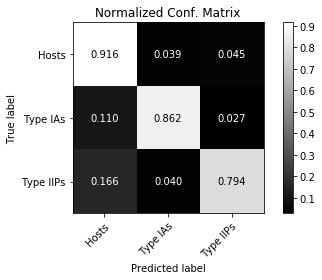

Normalized confusion matrix
Accuracy:  0.9278742035717649


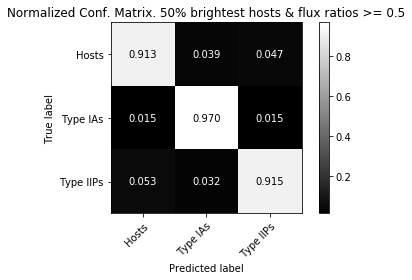





batch(07-18_14:44:48)/iter(67)_run(07-18_14:44:54_886971)/weights/weights.Ep72-ValAcc0.84.hdf5 

Normalized confusion matrix
Accuracy:  0.8481386492577913


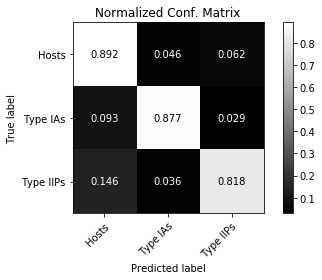

Normalized confusion matrix
Accuracy:  0.9352186058190264


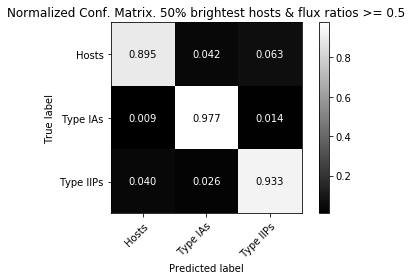





batch(07-19_11:36:51)/iter(92)_run(07-19_11:36:55_775852)/weights/weights.Ep75-ValAcc0.87.hdf5 

Normalized confusion matrix
Accuracy:  0.8742675060231601


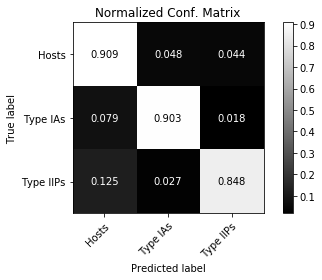

Normalized confusion matrix
Accuracy:  0.9553372461630206


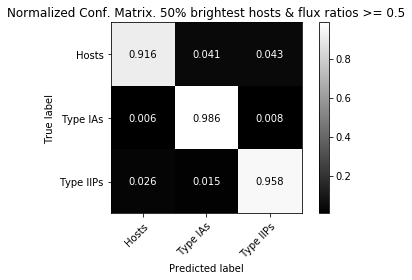





batch(07-19_11:36:51)/iter(64)_run(07-19_11:36:54_667053)/weights/weights.Ep73-ValAcc0.86.hdf5 

Normalized confusion matrix
Accuracy:  0.8620968368695111


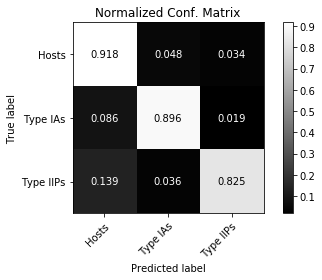

Normalized confusion matrix
Accuracy:  0.9469884812152789


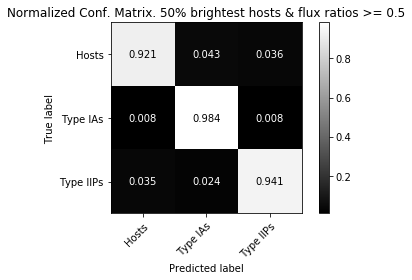





batch(07-19_11:36:51)/iter(45)_run(07-19_11:36:53_892865)/weights/weights.Ep70-ValAcc0.85.hdf5 

Normalized confusion matrix
Accuracy:  0.862671951503847


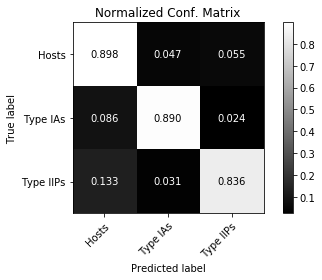

Normalized confusion matrix
Accuracy:  0.9462665955243087


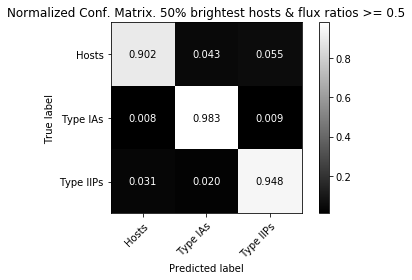





batch(07-19_11:36:51)/iter(27)_run(07-19_11:36:53_132799)/weights/weights.Ep73-ValAcc0.85.hdf5 

Normalized confusion matrix
Accuracy:  0.8551177430636512


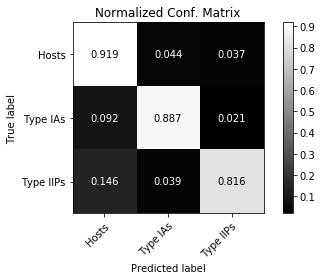

Normalized confusion matrix
Accuracy:  0.942814098741408


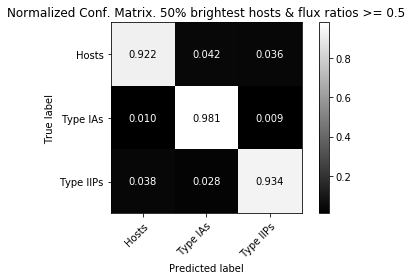





batch(07-20_15:55:00)/iter(47)_run(07-20_15:55:02_573722)/weights/weights.Ep58-ValAcc0.87.hdf5 

Normalized confusion matrix
Accuracy:  0.8791171213181006


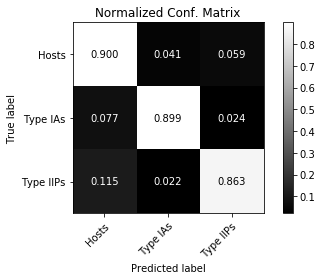

Normalized confusion matrix
Accuracy:  0.9564043815322808


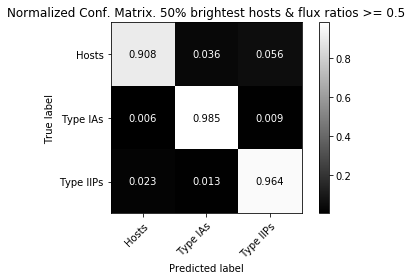

In [8]:
i = 0
for (y_pred_labels, y_pred_bright_labels) in zip(y_pred_labels_all, y_pred_bright_labels_all):
    print(models[i], "\n")
    plotConfusionMatrix(y_true=y_test_, y_pred=y_pred_labels, title="Normalized Conf. Matrix")
    plotConfusionMatrix(y_true=y_test_bright, y_pred=y_pred_bright_labels, title="Normalized Conf. Matrix. 50% brightest hosts & flux ratios >= 0.5")
    print("\n\n\n")
    i=i+1